<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/FRUIT_RECOGNITION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *IMPORT THE NECESSARY DATASETS*

In [1]:
pip install imutils

In [2]:
from imutils import paths
import cv2

In [3]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/Fruits'))

In [4]:
imagePaths

['/content/drive/MyDrive/Fruits/Kiwi/38_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/33_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/35_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/37_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/34_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/36_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/41_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/39_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/3_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/40_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/56_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/52_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/54_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/45_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/50_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/58_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/44_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/46_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/5_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/4_100.jpg',
 '/

In [5]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# *LOAD THE FRUIT DATA*

In [6]:
dirs = os.listdir('/content/drive/MyDrive/Fruits')
for dir in dirs:
  print(dir)

Kiwi
pear
pomegranate
Pineapple


In [7]:
base_dir = '/content/drive/MyDrive/Fruits'
img_size = 224
batch = 32

# *SEPARATE THE DATA SET INTO TRAINING AND VALIDATION DATA*

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed =123,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        batch_size=batch,
                                                        image_size = (img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size = batch,
                                                      image_size = (img_size,img_size))

Found 560 files belonging to 4 classes.
Using 448 files for training.
Found 560 files belonging to 4 classes.
Using 112 files for validation.


In [9]:
fruit_name = train_ds.class_names
fruit_name

['Kiwi', 'Pineapple', 'pear', 'pomegranate']

# *PLOT THE FRUIT DATA*

In [10]:
import matplotlib.pyplot as plt

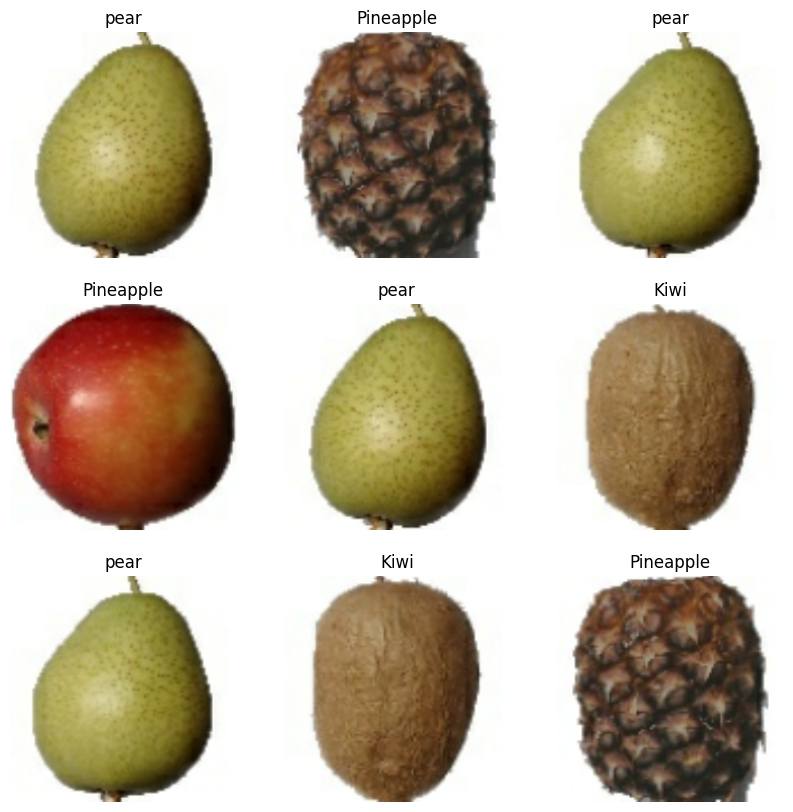

In [11]:
plt.figure(figsize =(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruit_name[labels[i]])
        plt.axis('off')

# *IMPROVEMENT OF THE MODEL USING AUTOTUNE*

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(250).prefetch(buffer_size=AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

# *DATA AUGUMENTATION*

In [20]:
data_augmentation = Sequential ([
     layers.RandomFlip("horizontal",input_shape =(img_size,img_size)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1)
])

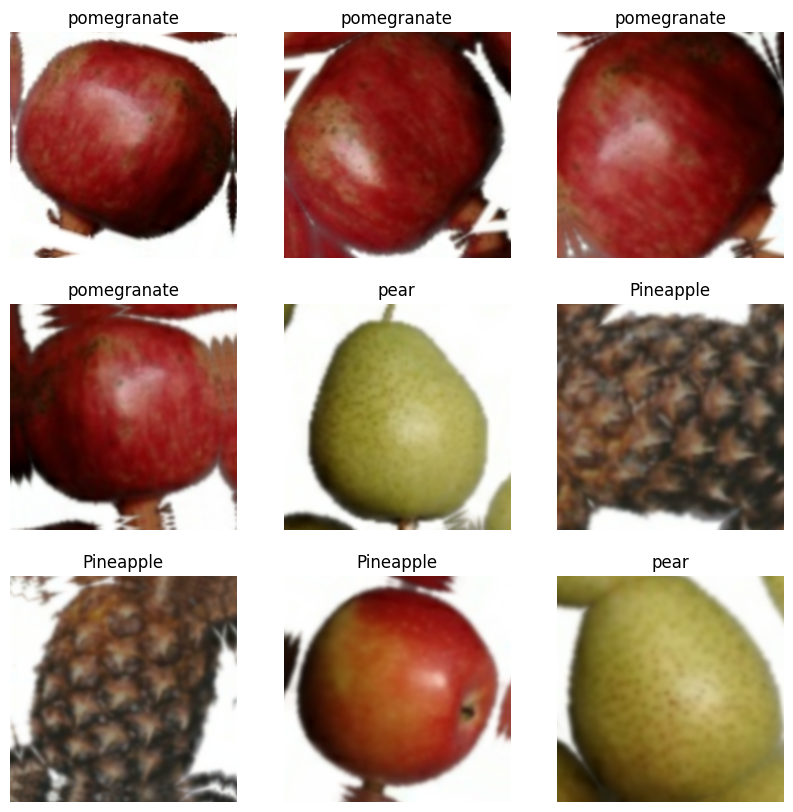

In [21]:
# Ensure the variable name is spelled correctly
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Initialize the variable with the Sequential model
# This assumes that the layers and img_size variables are defined and accessible

i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)  # Corrected variable name
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruit_name[labels[i]])
        plt.axis('off')

# *Model Creation*

In [24]:
model = Sequential([
    layers.Rescaling(1./255),  # Scale the input data
    data_augmentation,  # Apply data augmentation
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size, 3)),  # Add the input_shape argument
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [25]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
# Call the model on a batch of data
model(next(iter(train_ds))[0])

<tf.Tensor: shape=(32, 5), dtype=float32, numpy=
array([[-0.0281571 , -0.1291947 ,  0.06171003, -0.13511519, -0.12005667],
       [-0.12191048, -0.00574507,  0.13526247, -0.15017991, -0.00473666],
       [-0.0354908 , -0.12452433,  0.04368284, -0.1252976 , -0.10493793],
       [-0.11759636, -0.13013439,  0.05941524, -0.1315534 , -0.0616379 ],
       [-0.12026501, -0.08435968,  0.05661723, -0.06354348, -0.11950567],
       [-0.02908812, -0.17918786,  0.11967702, -0.12337574, -0.14106885],
       [-0.20740098, -0.0882008 ,  0.13844363, -0.15147741, -0.00599168],
       [-0.12072098, -0.15147784,  0.07350267, -0.12411775, -0.08530377],
       [-0.04505435, -0.16590613,  0.04048162, -0.07106511, -0.02577675],
       [-0.06971574, -0.05256458,  0.07032928, -0.07955793, -0.12209603],
       [-0.10911081, -0.07995822,  0.04929301, -0.03748455, -0.06309574],
       [-0.14939733, -0.09591544, -0.00839742,  0.00979926, -0.10039684],
       [-0.11272658, -0.10188073, -0.00522466, -0.06881716, -0.

In [29]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (32, 224, 224, 3)         0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224)          0         
                                                                 
 conv2d_15 (Conv2D)          (32, 224, 224, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (32, 112, 112, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (32, 112, 112, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (32, 56, 56, 32)          0         
 ng2D)                                                

# *MODEL FITTING*

In [31]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
14/14 [==============================] - 51s 3s/step - loss: 2.0824 - accuracy: 0.3817 - val_loss: 1.2393 - val_accuracy: 0.4464
Epoch 2/15
14/14 [==============================] - 30s 2s/step - loss: 0.9849 - accuracy: 0.5424 - val_loss: 0.5298 - val_accuracy: 0.8929
Epoch 3/15
14/14 [==============================] - 31s 2s/step - loss: 0.5215 - accuracy: 0.7991 - val_loss: 0.4831 - val_accuracy: 0.7589
Epoch 4/15
14/14 [==============================] - 32s 2s/step - loss: 0.3764 - accuracy: 0.8527 - val_loss: 0.0916 - val_accuracy: 0.9911
Epoch 5/15
14/14 [==============================] - 30s 2s/step - loss: 0.1460 - accuracy: 0.9464 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 31s 2s/step - loss: 0.0651 - accuracy: 0.9866 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 30s 2s/step - loss: 0.0354 - accuracy: 0.9911 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 8/15
14/14 [==

# *USING THE MODEL FOR PREDICTION*

In [32]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/Fruits/Kiwi/33_100.jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
fruit_name[np.argmax(result)]

1/1 [==============================] - 0s 175ms/step


'Kiwi'

In [33]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/Fruits/pomegranate/324_100.jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
fruit_name[np.argmax(result)]

1/1 [==============================] - 0s 40ms/step


'pomegranate'

In [34]:
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path, target_size=(224,224))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + fruit_name[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome

In [35]:
classify_images('/content/drive/MyDrive/Fruits/Kiwi/35_100.jpg')

1/1 [==============================] - 0s 37ms/step


'The Image belongs to Kiwi with a score of 99.99723434448242'

# *SAVING THE MODEL*

In [36]:
model.save('Fruit_Recog_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
!pip install -q gradio torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s e

In [38]:
# Downloading files from the demo repo
import os
!wget -q https://github.com/gradio-app/gradio/raw/main/demo/image_classification/Kiwi.jpg

In [39]:
import gradio as gr
import torch
import requests
from torchvision import transforms

model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True).eval()
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def predict(inp):
  inp = transforms.ToTensor()(inp).unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences

demo = gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=3),
             examples=[["Kiwi.jpg"]],
             )

demo.launch()

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://88a0fb7288a06c7e4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
